# Probability Theory: an Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("whitegrid")

In [2]:
rng = np.random.default_rng()  # can be called without a seed
rng.random()

0.7536685591353133

## Flipping coins

Let's conduct an experiment tossing n coins and calculating the frequencies of Heads and Tails.

`coin_trial` is a function that simulates the toss of a coin. 

Let's assume it returns `True` if the result is Head and `False` if the result is Tail.

In [3]:
def coin_trial():
    ''''
    It simulates the toss of a coin.
    It returns True if Head, else Tail.
    '''
    #return (np.random.rand() > 0.5)
    return (rng.random() > 0.5)

`coin_simulate` simulates the toss of n coins. It counts the number of Heads and Tails, and calculate their frequencies. Is displays 

In [4]:
def coin_simulate(n):
    '''
    It simulates the toss of n coins, and shows the graphical results in each step.
    '''
    # Let's create an array with random results using coin_trail()

    coins = np.array([coin_trial() for i in range(n)])

    # Now, let's calculate the cumulative probability for heads and tails
    # by counting the quantity of running heads

    heads : int = 0
    p_heads = np.ndarray(n)
    p_tails = np.ndarray(n)
    for i in range(n):
        if coins[i] == True:
            heads += 1
        p_heads[i] = 1.0 * heads / (i + 1)

    # The probability for tails is the complement of what was calculated for heads

    p_tails = [1 - p_heads[i] for i in range(n)]

    # One numpy range will serve as the X axis

    x = np.arange(n)

    # Now let's plot two sets of points (x, p_heads) and (x, p_tails)

    plt.plot(x, p_heads, 'og', label='Head')
    plt.plot(x, p_tails, 'ob', label='Tail')
    plt.legend()
    plt.ylabel('Frequency')
    plt.title('Coins')
    plt.show()
    print('Heads = %2i    Prob(Head) = %.3f' %(heads, heads/n))
    print('Tails = %2i    Prob(Tail) = %.3f' %(n-heads, (n-heads)/n))

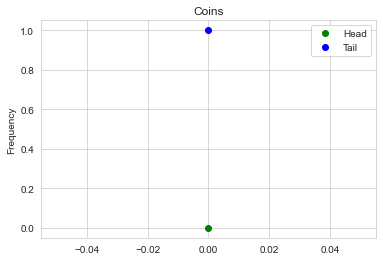

Heads =  0    Prob(Head) = 0.000
Tails =  1    Prob(Tail) = 1.000


In [5]:
# Tossing one coin
coin_simulate(1)

`coin_simulate(1)` toss one coin. Head is represented in green, and Tail in blue.

- If the result is a Head, you see the green dot with a frequency of 1 and the blue dot with a frequency of 0.

- If the result is a Tail, you see the blue dot with a frequency of 1 and the green dot with a frequency of 0.

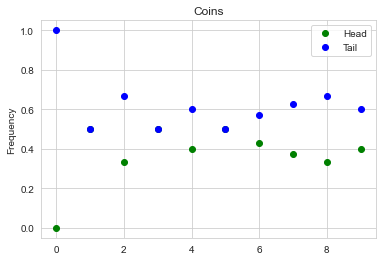

Heads =  4    Prob(Head) = 0.400
Tails =  6    Prob(Tail) = 0.600


In [6]:
# Tossing 10 coins
coin_simulate(10)

`coin_simulate(10)` tosses 10 coins. The frequencies of Heads (`p_heads`) and Tails (`p_tails`) are calculated and graphed in each step.

The last two lines show a summary of the experiment.

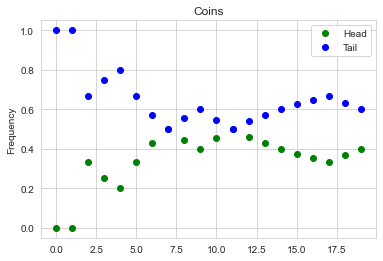

Heads =  8    Prob(Head) = 0.400
Tails = 12    Prob(Tail) = 0.600


In [7]:
# Tossing 20 coins
coin_simulate(20)

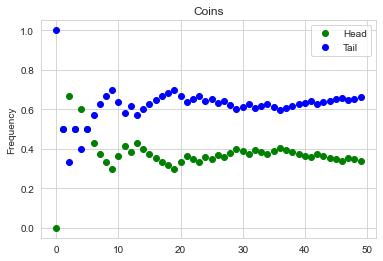

Heads = 17    Prob(Head) = 0.340
Tails = 33    Prob(Tail) = 0.660


In [8]:
# Tossing 50 coins
coin_simulate(50)

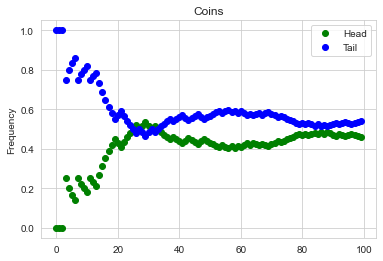

Heads = 46    Prob(Head) = 0.460
Tails = 54    Prob(Tail) = 0.540


In [9]:
# Tossing 100 coins
coin_simulate(100)

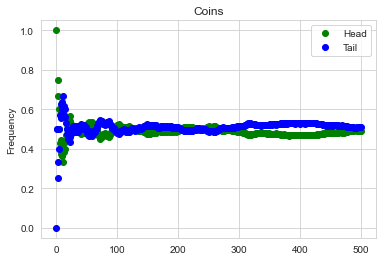

Heads = 246    Prob(Head) = 0.492
Tails = 254    Prob(Tail) = 0.508


In [10]:
# Tossing 500 coins
coin_simulate(500)

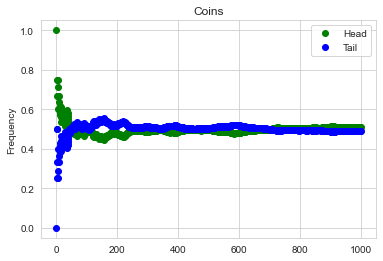

Heads = 508    Prob(Head) = 0.508
Tails = 492    Prob(Tail) = 0.492


In [11]:
# Tossing 1000 coins
coin_simulate(1000)

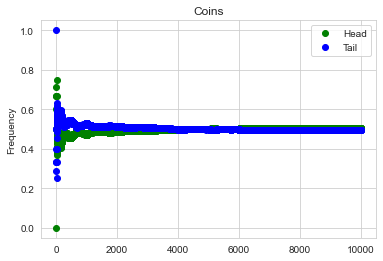

Heads = 5045    Prob(Head) = 0.504
Tails = 4955    Prob(Tail) = 0.495


In [12]:
# Tossing 10000 coins
coin_simulate(10000)

As we can see, the probabilities of Heads and Tails converge to 0.5

## Rolling fair dice

Let's conduct an experiment tossing n dice and calculating the frequencies of the values 1, 2, 3, 4, 5, and 6.

In [13]:
def die_trial(pr = [0, 1/6, 2/6, 3/6, 4/6, 5/6, 1]):
    '''
    It simulates the roll of a die.
    pr parameter represents probabilities of a regular die.
    (You can change it to simulate any weighted die.)
    '''
    #rnd = np.random.rand()
    rnd = rng.random()
    l = [i for i in range(1,7) if pr[i-1] <= rnd < pr[i]]
    
    return l[0]

In [14]:
def fair_die_simulate(n):
    '''
    It simulates the roll of n dice, and shows the graphical results in each step.
    '''
    cols = ['1','2','3','4','5','6']
    dice = []
    new_die = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0}
    die_color = {'1':'og', '2':'oc', '3':'ob', '4':'ok', '5':'om', '6':'or'}
    fq = pd.DataFrame(columns=cols)
    for i in range(n):
        dice.append(die_trial())
        for key in new_die:
            new_die[key] = dice.count(int(key))/(i+1)
        fq = fq.append(new_die, ignore_index=True)
    x = np.arange(1,n+1)
    for c in cols:
        plt.plot(x,fq[c], die_color[c], label=c)
    plt.legend()
    plt.ylabel('Frequency')
    plt.title('Dice')
    plt.show()
    for c in cols:
        print('N1 = %3i    Prob(N%c) = %.3f' %(dice.count(1), c, fq[c][n-1]))


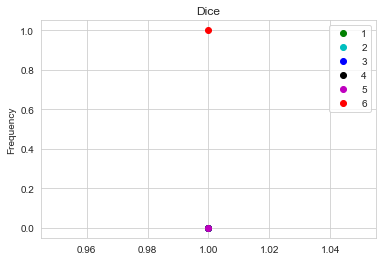

N1 =   0    Prob(N1) = 0.000
N1 =   0    Prob(N2) = 0.000
N1 =   0    Prob(N3) = 0.000
N1 =   0    Prob(N4) = 0.000
N1 =   0    Prob(N5) = 0.000
N1 =   0    Prob(N6) = 1.000


In [15]:
# Rolling one die
fair_die_simulate(1)

When you roll a die, the probability of the number that appears is 1, the probabilities of the other numbers are 0. 

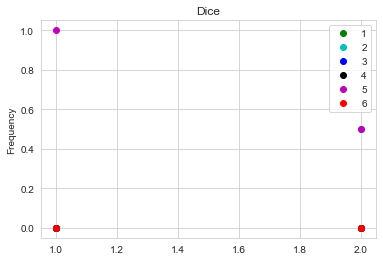

N1 =   0    Prob(N1) = 0.000
N1 =   0    Prob(N2) = 0.500
N1 =   0    Prob(N3) = 0.000
N1 =   0    Prob(N4) = 0.000
N1 =   0    Prob(N5) = 0.500
N1 =   0    Prob(N6) = 0.000


In [16]:
# Rolling two dice
fair_die_simulate(2)

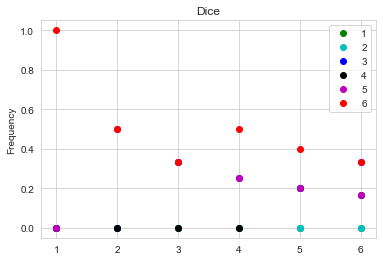

N1 =   0    Prob(N1) = 0.000
N1 =   0    Prob(N2) = 0.000
N1 =   0    Prob(N3) = 0.333
N1 =   0    Prob(N4) = 0.167
N1 =   0    Prob(N5) = 0.167
N1 =   0    Prob(N6) = 0.333


In [17]:
# Rolling 6 fair dice
fair_die_simulate(6)

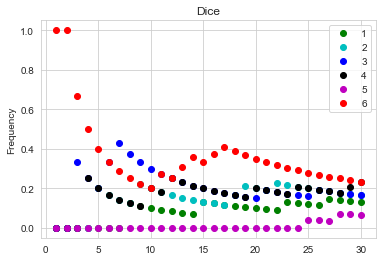

N1 =   4    Prob(N1) = 0.133
N1 =   4    Prob(N2) = 0.167
N1 =   4    Prob(N3) = 0.167
N1 =   4    Prob(N4) = 0.233
N1 =   4    Prob(N5) = 0.067
N1 =   4    Prob(N6) = 0.233


In [18]:
# Rolling 30 fair dice
fair_die_simulate(30)

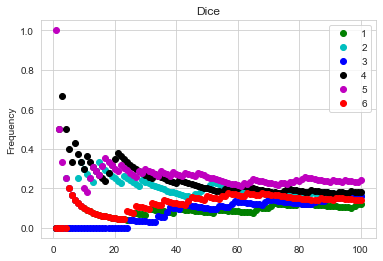

N1 =  12    Prob(N1) = 0.120
N1 =  12    Prob(N2) = 0.160
N1 =  12    Prob(N3) = 0.160
N1 =  12    Prob(N4) = 0.180
N1 =  12    Prob(N5) = 0.240
N1 =  12    Prob(N6) = 0.140


In [19]:
# Rolling 100 fair dice
fair_die_simulate(100)

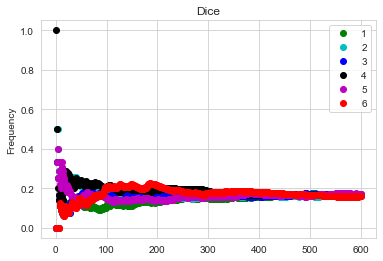

N1 = 100    Prob(N1) = 0.167
N1 = 100    Prob(N2) = 0.167
N1 = 100    Prob(N3) = 0.163
N1 = 100    Prob(N4) = 0.170
N1 = 100    Prob(N5) = 0.172
N1 = 100    Prob(N6) = 0.162


In [20]:
# Rolling 600 fair dice
fair_die_simulate(600)

Notice that the probabilities of the 6 values are near 1/6=0.166.

## Rolling unfair dice

Let's make an experiment with unfair dice. 

The probability to get a 5 will be 1/2. The probability of any other number will be equal to 1/10.

In [21]:
def unfair_dice_simulate(n):
    '''
    It simulates the roll of n weighted dice (pr('5')=1/2),
    and shows the graphical results in each step.
    '''
    dice = []
    pr = [0, 1/10, 2/10, 3/10, 4/10, 9/10, 1]
    new_die = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0}
    fq = pd.DataFrame(columns=['1','2','3','4','5','6'])
    for i in range(n):
        dice.append(die_trial(pr))
        for key in new_die:
            new_die[key] = dice.count(int(key))/(i+1)
        fq = fq.append(new_die, ignore_index=True)
    x = np.arange(1,n+1)
    plt.plot(x,fq['1'],'og',label='1')
    plt.plot(x,fq['2'],'oc',label='2')
    plt.plot(x,fq['3'],'ob',label='3')
    plt.plot(x,fq['4'],'ok',label='4')
    plt.plot(x,fq['5'],'om',label='5')
    plt.plot(x,fq['6'],'or',label='6')
    plt.legend()
    plt.ylabel('Frequency')
    plt.title('Dice')
    plt.show()
    print('N1 = %3i    Prob(N1) = %.3f' %(dice.count(1), fq['1'][n-1]))
    print('N2 = %3i    Prob(N2) = %.3f' %(dice.count(2), fq['2'][n-1]))
    print('N3 = %3i    Prob(N3) = %.3f' %(dice.count(3), fq['3'][n-1]))
    print('N4 = %3i    Prob(N4) = %.3f' %(dice.count(4), fq['4'][n-1]))
    print('N5 = %3i    Prob(N5) = %.3f' %(dice.count(5), fq['5'][n-1]))
    print('N6 = %3i    Prob(N6) = %.3f' %(dice.count(6), fq['6'][n-1]))

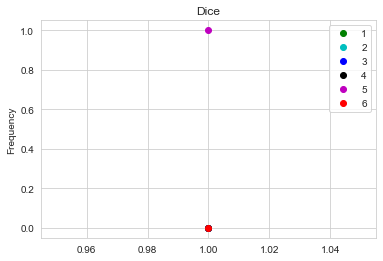

N1 =   0    Prob(N1) = 0.000
N2 =   0    Prob(N2) = 0.000
N3 =   0    Prob(N3) = 0.000
N4 =   0    Prob(N4) = 0.000
N5 =   1    Prob(N5) = 1.000
N6 =   0    Prob(N6) = 0.000


In [22]:
# Rolling one unfair die
unfair_dice_simulate(1)

The graph above represents the result of rolling a weighted die. The number we got has a probability of 1, and the others 0.

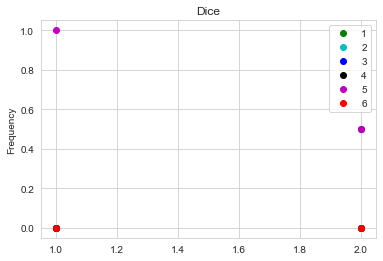

N1 =   0    Prob(N1) = 0.000
N2 =   0    Prob(N2) = 0.000
N3 =   1    Prob(N3) = 0.500
N4 =   0    Prob(N4) = 0.000
N5 =   1    Prob(N5) = 0.500
N6 =   0    Prob(N6) = 0.000


In [23]:
# Rolling two unfair dice
unfair_dice_simulate(2)

The graph above shows the result of rolling two dice. Most of probabilities are still 0.

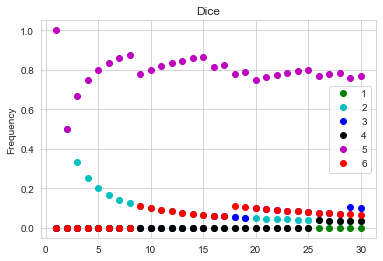

N1 =   0    Prob(N1) = 0.000
N2 =   1    Prob(N2) = 0.033
N3 =   3    Prob(N3) = 0.100
N4 =   1    Prob(N4) = 0.033
N5 =  23    Prob(N5) = 0.767
N6 =   2    Prob(N6) = 0.067


In [24]:
# Rolling 30 unfair dice
unfair_dice_simulate(30)

Now you can see that the probability of 5 is higher than the others.

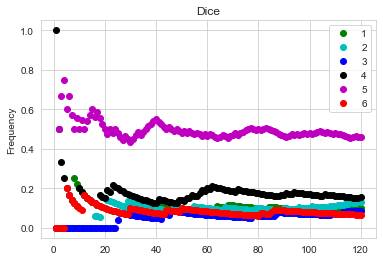

N1 =  12    Prob(N1) = 0.100
N2 =  16    Prob(N2) = 0.133
N3 =  10    Prob(N3) = 0.083
N4 =  19    Prob(N4) = 0.158
N5 =  55    Prob(N5) = 0.458
N6 =   8    Prob(N6) = 0.067


In [25]:
# Rolling 120 unfair dice
unfair_dice_simulate(120)

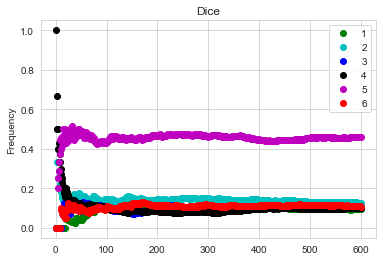

N1 =  57    Prob(N1) = 0.095
N2 =  76    Prob(N2) = 0.127
N3 =  64    Prob(N3) = 0.107
N4 =  61    Prob(N4) = 0.102
N5 = 277    Prob(N5) = 0.462
N6 =  65    Prob(N6) = 0.108


In [26]:
# Rolling 600 unfair dice
unfair_dice_simulate(600)

Notice that after 600 iterations, the probability of the number 5 is close to 0.5; all others have probabilities near 1/10 = 0.1.